In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/vijaykumardevalla/Documents/ML in Business/project/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,$0.00,1,1,1,"$101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"$83,807.86",1,0,1,"$112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"$159,660.80",3,1,0,"$113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,$0.00,2,0,0,"$93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"$125,510.82",1,1,1,"$79,084.10",0


In [4]:
# Assuming 'exited' is the column you're interested in
exit_counts = df['Exited'].value_counts()

# Print the counts
print("Number of 0s:", exit_counts[0])
print("Number of 1s:", exit_counts[1])


Number of 0s: 7963
Number of 1s: 2037


In [5]:
df['EstimatedSalary'].unique()

array(['$101,348.88 ', '$112,542.58 ', '$113,931.57 ', ..., '$42,085.58 ',
       '$92,888.52 ', '$38,190.78 '], dtype=object)

Surname, customerId are not needed to explain the target variable exited. We are going to avoid taking Gender into consideration.

In [6]:
columns_to_drop=['CustomerId','Surname','RowNumber','Gender']

In [7]:
df=df.drop(columns=columns_to_drop)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CreditScore      10000 non-null  int64 
 1   Geography        10000 non-null  object
 2   Age              10000 non-null  int64 
 3   Tenure           10000 non-null  int64 
 4   Balance          10000 non-null  object
 5   NumOfProducts    10000 non-null  int64 
 6   HasCrCard        10000 non-null  int64 
 7   IsActiveMember   10000 non-null  int64 
 8   EstimatedSalary  10000 non-null  object
 9   Exited           10000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 781.4+ KB


In [9]:
#Creating dummies for the columns with object data type

In [10]:
# Select object columns
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['Geography', 'Balance', 'EstimatedSalary']


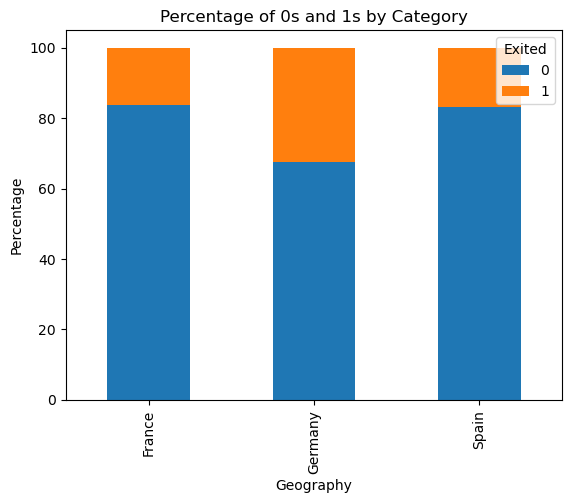

In [11]:
# Group by 'Category' and calculate the percentage of 0s and 1s
grouped = df.groupby('Geography')['Exited'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Create a clustered column chart
ax = grouped.plot(kind='bar', stacked=True)

# Customize the chart
plt.title('Percentage of 0s and 1s by Category')
plt.xlabel('Geography')
plt.ylabel('Percentage')
plt.legend(title='Exited', labels=['0', '1'])

# Show the chart
plt.show()

From the above graph we can see that, the percentages of 0s and 1s are almost the same in Spain and France. Although the percentage of 1s is slightly higher in Germany we can't really conclude that Germany has more exit rate.

It's not a good idea to create categories for salary although it's data type is object because there are too many unique values obviously. Instead I will remove the dollar symbol and convert it to integers.

In [12]:
df['EstimatedSalary'] = df['EstimatedSalary'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CreditScore      10000 non-null  int64 
 1   Geography        10000 non-null  object
 2   Age              10000 non-null  int64 
 3   Tenure           10000 non-null  int64 
 4   Balance          10000 non-null  object
 5   NumOfProducts    10000 non-null  int64 
 6   HasCrCard        10000 non-null  int64 
 7   IsActiveMember   10000 non-null  int64 
 8   EstimatedSalary  10000 non-null  int64 
 9   Exited           10000 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 781.4+ KB


In [15]:
df.describe().isnull().sum()

CreditScore        0
Age                0
Tenure             0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
df['Balance'] = df['Balance'].replace('[\$,]', '', regex=True).astype(float)

In [17]:
df['Balance'] = df['Balance'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CreditScore      10000 non-null  int64 
 1   Geography        10000 non-null  object
 2   Age              10000 non-null  int64 
 3   Tenure           10000 non-null  int64 
 4   Balance          10000 non-null  int64 
 5   NumOfProducts    10000 non-null  int64 
 6   HasCrCard        10000 non-null  int64 
 7   IsActiveMember   10000 non-null  int64 
 8   EstimatedSalary  10000 non-null  int64 
 9   Exited           10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [19]:
# Select object columns
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['Geography']


In [20]:
df = pd.get_dummies(df, columns=object_columns,dtype=int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CreditScore        10000 non-null  int64
 1   Age                10000 non-null  int64
 2   Tenure             10000 non-null  int64
 3   Balance            10000 non-null  int64
 4   NumOfProducts      10000 non-null  int64
 5   HasCrCard          10000 non-null  int64
 6   IsActiveMember     10000 non-null  int64
 7   EstimatedSalary    10000 non-null  int64
 8   Exited             10000 non-null  int64
 9   Geography_France   10000 non-null  int64
 10  Geography_Germany  10000 non-null  int64
 11  Geography_Spain    10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB


In [22]:
df.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [23]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,1,0,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,1,0,0
3,699,39,1,0,2,0,0,93826,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1


In [24]:

!pip install -U scikit-learn imbalanced-learn

In [25]:
 y=df['Exited']
 X=df.drop(columns=['Exited'])

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.4)
X, y = smote.fit_resample(X, y)

In [27]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,0
3,699,39,1,0,2,0,0,93826,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1


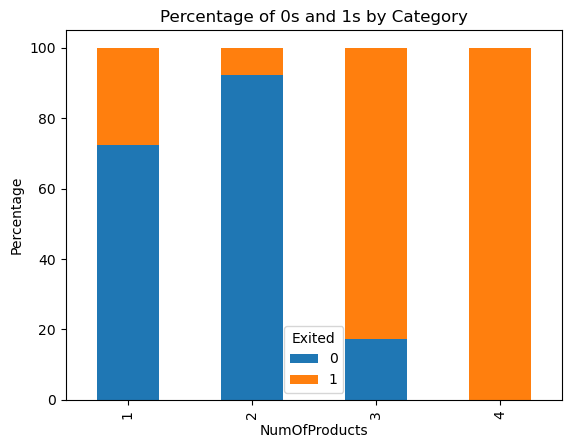

In [28]:
# Group by 'Category' and calculate the percentage of 0s and 1s
grouped = df.groupby('NumOfProducts')['Exited'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Create a clustered column chart
ax = grouped.plot(kind='bar', stacked=True)

# Customize the chart
plt.title('Percentage of 0s and 1s by Category')
plt.xlabel('NumOfProducts')
plt.ylabel('Percentage')
plt.legend(title='Exited', labels=['0', '1'])

# Show the chart
plt.show()

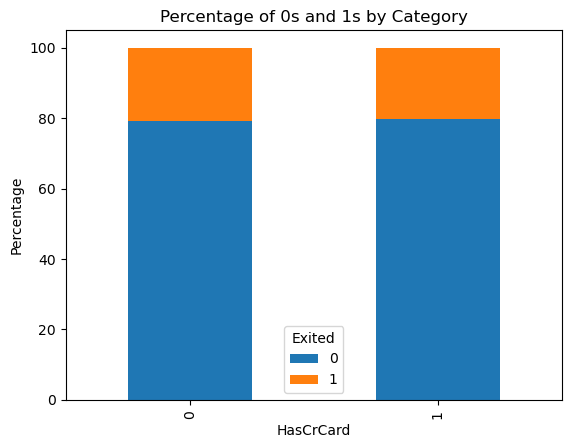

In [29]:
# Group by 'Category' and calculate the percentage of 0s and 1s
grouped = df.groupby('HasCrCard')['Exited'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Create a clustered column chart
ax = grouped.plot(kind='bar', stacked=True)

# Customize the chart
plt.title('Percentage of 0s and 1s by Category')
plt.xlabel('HasCrCard')
plt.ylabel('Percentage')
plt.legend(title='Exited', labels=['0', '1'])

# Show the chart
plt.show()

# Gradient Boosting

In [30]:
from sklearn.model_selection import train_test_split

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7803, 11), (3345, 11), (7803,), (3345,))

In [31]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
f1_class_1_scorer = make_scorer(f1_score, pos_label=1)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report


# Training the gb model
gb_clf = GradientBoostingClassifier(random_state=42, learning_rate=0.2, max_depth=30, n_estimators=100)
gb_clf.fit(X_train, y_train)

# Predicting and evaluating on the test set
y_pred_gb = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1_score = f1_score(y_test, y_pred_gb, pos_label=1)

gb_accuracy, gb_precision, gb_recall, gb_f1_score

(0.7916292974588939,
 0.6300211416490487,
 0.6320254506892895,
 0.6310217046056115)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the gb model
gb_clf = GradientBoostingClassifier(random_state=42, learning_rate=0.2, max_depth=30, n_estimators=100)
gb_clf.fit(X_train, y_train)

# Predicting probabilities on the test set
y_pred_prob_gb = gb_clf.predict_proba(X_test)[:, 1]  # Probability of class 1

# Converting probabilities to class predictions based on a threshold (e.g., 0.5)
y_pred_gb = (y_pred_prob_gb > 0.95).astype(int)

# Evaluating the model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1_score = f1_score(y_test, y_pred_gb)

gb_accuracy, gb_precision, gb_recall, gb_f1_score


(0.7946188340807175,
 0.6403508771929824,
 0.6193001060445387,
 0.6296495956873315)

In [34]:
# Counting the number of predicted 1s
num_ones = y_pred_gb.sum()

print("Number of predicted 1s:", num_ones)


Number of predicted 1s: 912


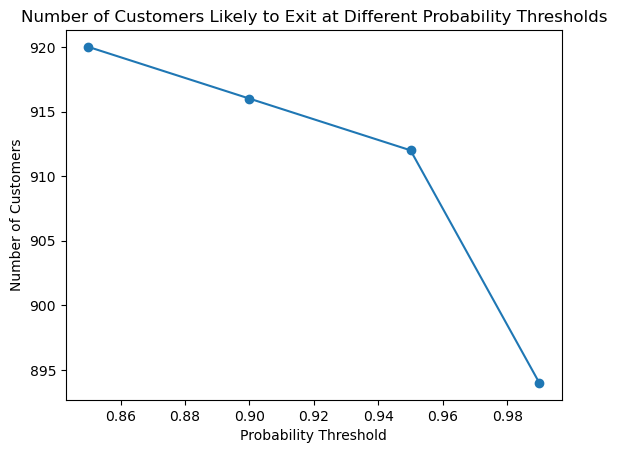

In [35]:
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_pred_prob_gb = gb_clf.predict_proba(X_test)[:, 1]

# Define probability thresholds
thresholds = [0.99, 0.95, 0.90, 0.85]

# Initialize an empty list to store counts for each threshold
counts_at_thresholds = []

# Count the number of customers exceeding each threshold
for threshold in thresholds:
    num_customers = (y_pred_prob_gb > threshold).sum()
    counts_at_thresholds.append(num_customers)

# Plotting the results
plt.plot(thresholds, counts_at_thresholds, marker='o')
plt.title('Number of Customers Likely to Exit at Different Probability Thresholds')
plt.xlabel('Probability Threshold')
plt.ylabel('Number of Customers')
plt.show()


In [36]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2402
           1       0.64      0.62      0.63       943

    accuracy                           0.79      3345
   macro avg       0.75      0.74      0.74      3345
weighted avg       0.79      0.79      0.79      3345



# permutation importance

In [37]:
from sklearn.inspection import permutation_importance

# Assuming gb_clf is your trained GradientBoostingClassifier
result = permutation_importance(gb_clf, X_test, y_test, n_repeats=10, random_state=42)

# Get mean importance scores and confidence intervals
importance_scores = result.importances_mean
confidence_intervals = result.importances_std

# Display results
for feature, score, ci in zip(X.columns, importance_scores, confidence_intervals):
    print(f"{feature}: {score:.4f} +/- {ci:.4f}")


CreditScore: -0.0026 +/- 0.0049
Age: 0.0730 +/- 0.0095
Tenure: -0.0015 +/- 0.0030
Balance: 0.0401 +/- 0.0055
NumOfProducts: 0.0679 +/- 0.0058
HasCrCard: 0.0042 +/- 0.0008
IsActiveMember: 0.0351 +/- 0.0027
EstimatedSalary: 0.0058 +/- 0.0035
Geography_France: 0.0809 +/- 0.0043
Geography_Germany: 0.0230 +/- 0.0024
Geography_Spain: 0.0572 +/- 0.0038


# Recursive Feature Elimination

In [38]:
from sklearn.feature_selection import RFE

# Create the RFE model and select the top n features
rfe = RFE(estimator=gb_clf, n_features_to_select=8)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]


In [39]:
# Interpret selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France'],
      dtype='object')


# creating deciles

In [ ]:
# Predicting probabilities
probabilities = gb_clf.predict_proba(X_test)
probabilities[:,1]

# Hyper Parameter Tuning for Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score

# Creating a custom scorer for AUC-PR
aucpr_scorer = make_scorer(average_precision_score, needs_proba=True)

# Defining the parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 150],  # default=100 - larger values are likely to lead to overfitting
    'max_depth': [1, 2, 3, 4, 5],  # default=3
    'learning_rate': [0.1, 0.2],  # default=0.1, [0.01 - 0.2]
}

# Setting up the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Setting up GridSearchCV with AUC-PR as the scoring metric
grid_search_gb = GridSearchCV(estimator=gb_clf,
                              param_grid=param_grid_gb,
                              scoring=f1_class_1_scorer,
                              cv=5,
                              verbose=1)

# Fit GridSearchCV on your data
# Replace X_train and y_train with your training data
grid_search_gb.fit(X_train, y_train)

# Best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("Best Parameters:", best_params_gb)
print("Best F1 Score:", best_score_gb)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best F1 Score: 0.7294848737282037


# Running the Gradient Boosting Model with best model parameters

In [66]:
# Training the gb model
gb_clf = GradientBoostingClassifier(random_state=42, learning_rate=0.1, max_depth=5, n_estimators=100)
gb_clf.fit(X_train, y_train)

# Predicting and evaluating on the test set
y_pred_gb = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1_score = f1_score(y_test, y_pred_gb, pos_label=1)

gb_accuracy, gb_precision, gb_recall, gb_f1_score



(0.8600896860986547,
 0.8112712975098296,
 0.6564156945917285,
 0.7256740914419695)

In [67]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2402
           1       0.81      0.66      0.73       943

    accuracy                           0.86      3345
   macro avg       0.84      0.80      0.82      3345
weighted avg       0.86      0.86      0.86      3345



# Decile Creation

In [68]:
# Predicting probabilities
probabilities = gb_clf.predict_proba(X_test)
probabilities[:,1]

array([0.04301056, 0.19405517, 0.16225596, ..., 0.20881699, 0.03185283,
       0.90139272])

In [69]:
X_test['scores'] = probabilities[:, 1]

In [70]:
# Calculate deciles
X_test['Decile'] = pd.qcut(X_test['scores'], q=10, labels=False)

# Print the DataFrame with deciles
print(X_test[['Decile','scores']])

       Decile    scores
6808        1  0.043011
483         5  0.194055
8418        5  0.162256
3772        2  0.055050
9742        3  0.066873
...       ...       ...
10852       4  0.096060
7252        8  0.683899
7664        6  0.208817
8031        1  0.031853
9210        9  0.901393

[3345 rows x 2 columns]


In [71]:
combined_df = pd.concat([X_test, y_test], axis=1)
combined_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,scores,Decile,Exited
6808,709,30,9,115479,2,1,1,134732,0,1,0,0.043011,1,0
483,486,37,9,115217,2,1,0,144995,0,1,0,0.194055,5,0
8418,683,39,2,100062,2,1,0,109201,0,1,0,0.162256,5,0
3772,745,34,7,132944,1,1,1,31802,0,0,1,0.055050,2,0
9742,715,45,4,0,2,1,1,55043,1,0,0,0.066873,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,597,40,8,162723,2,0,0,37055,0,1,0,0.096060,4,1
7252,567,40,7,122265,1,1,0,138552,0,1,0,0.683899,8,0
7664,602,35,8,0,1,1,1,22499,1,0,0,0.208817,6,0
8031,666,36,6,0,2,1,0,176692,0,0,1,0.031853,1,0


In [73]:
combined_df.to_excel("/Users/vijaykumardevalla/Documents/ML in Business/project/decile.xlsx", index=False)


# Feature selection gradient boosting hyper parameter tuning

In [64]:

explainer = shap.KernelExplainer(gb_clf.predict_proba, shap.sample(X_train, 100))

# Compute SHAP values for a subset of the test set
shap_values = explainer.shap_values(X_test.iloc[:100, :])

# Create a SHAP Explanation object
expl = shap.Explanation(values=np.array(shap_values),
                        data=X_test.iloc[:100, :],
                        feature_names=list(X_test.columns))


  0%|          | 0/100 [00:00<?, ?it/s]

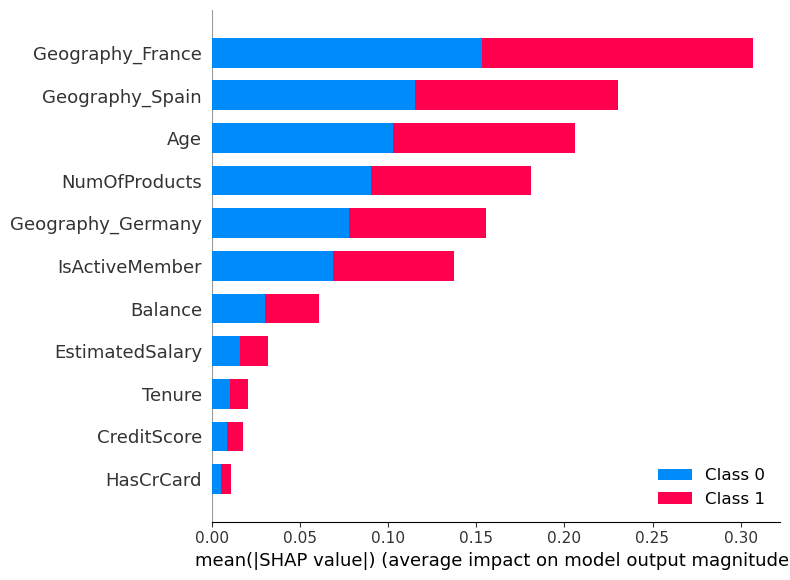

In [65]:
shap.summary_plot(shap_values, X_test.iloc[:100, :])

In [44]:
!pip install xgboost


# Permutation Importance method

# XGBoost Model

In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Fixed parameters
fixed_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'learning_rate': 0.2
}

# Hyperparameters to tune
param_grid = {
    'min_child_weight': [1, 5, 10], # default=1
    'min_samples_split': [2, 5, 10], # default=2
    'min_samples_leaf': [1, 2, 4], # default=1
    'max_features': ['sqrt'], # default='auto'
    'scale_pos_weight': [1, 10, 25], # default=1
    'alpha': [0, 0.1, 0.5, 1] # default=0
}

# Updating XGBoost Classifier with fixed parameters
xgb_classifier_fixed = XGBClassifier(**fixed_params, random_state=42)

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_classifier_fixed,
                           param_grid=param_grid,
                           scoring='f1',  # focusing on F1 score for imbalanced classification
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Fitting the model
grid_search.fit(X_train, y_train)

# Extract the best parameters
best_xgb_params = grid_search.best_params_
print("Best Parameters:", best_xgb_params)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:28:54] WAR

[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=10; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=10; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=10; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=10; total time=   0.3s
[CV] END alpha=0, max_features=s

/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:51] WAR

[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=1; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=10; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=10; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt,

/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:51] WAR

[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=1; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=10; total time=   0.4s
[CV] END alpha=0, max_features=sqrt

/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:52] WAR

[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=10; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=10; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=10; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqr

/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WAR

[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=10; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=10; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=10; total time=   0.3s
[CV] END alpha=0, max_features=sqrt

/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WAR

[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=10; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=1; total time=   0.3s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0, max_features=sqrt, min_child_weight=1, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=1; total time=   0.4s
[CV] END alpha=0, max_features=sqrt,

/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:53] WAR

Best Parameters: {'alpha': 0.1, 'max_features': 'sqrt', 'min_child_weight': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'scale_pos_weight': 10}


In [46]:
# Get the best F1 score for class 1
best_f1_score_1_log = grid_search.best_score_
print("Best F1 score: ", best_f1_score_1_log)

Best F1 score:  0.7236224072497774


In [47]:
from xgboost import XGBClassifier

# Initialize RF classifier
xgb = XGBClassifier(alpha=1, max_features='sqrt', min_child_weight=1,min_samples_leaf=1,min_samples_split=2,scale_pos_weight=10,n_estimators=100,max_depth=10,learning_rate=0.2)

In [48]:
# Fit the GridSearchCV to find the best hyperparameters
xgb.fit(X_train, y_train)

/Users/vijaykumardevalla/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:30:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features='sqrt',
              max_leaves=None, min_child_weight=1, min_samples_leaf=1,
              min_samples_split=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, ...)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report


In [50]:
y_pred_log = xgb.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Confusion Matrix:
[[2061  341]
 [ 230  713]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2402
           1       0.68      0.76      0.71       943

    accuracy                           0.83      3345
   macro avg       0.79      0.81      0.80      3345
weighted avg       0.84      0.83      0.83      3345

